## Using the Supervised Tuning Methods

This notebook contains examples on how to use the supervised_tuner module. Although the examples are for classification problems the same principles can be used for regression problems. Note both the eval_model() and tune_test_model() functions return dictionaries containing containing: 

- 'model': final model fit (full data refit for param tuning and final cv data fit for eval) 
- 'metrics': dictionary containing key (metric) value (list of cv score) pairs during model eval
- 'fin_cv_df': final cv data with predictions
- 'params': parameters of model  
- 'features': list of features used in model fitting
- 'log_data': empty dictionary if no log wanted, else all data that is to be logged 

The following classification and regression methods are currently fully supported (parameter to pass in: sklearn model initiated):

In [6]:
from eagles.Supervised import model_support

model_support.print_classifiers()
print('\n')
model_support.print_regressors()

Supoorted Classification Models


,Abbreviation,Model
0,rf_clf,RandomForestClassifier
1,et_clf,ExtraTreesClassifier
2,gb_clf,GradientBoostingClassifier
3,dt_clf,DecisionTreeClassifier
4,logistic,LogisticRegression
5,svc,SVC
6,knn_clf,KNeighborsClassifier
7,nn,MLPClassifier
8,ada_clf,AdaBoostClassifier
9,vc_clf,VotingClassifier


Voting Classifier Defaults: Random Forest Classifier x Logistic Regression

Classification Metrics:
['accuracy', 'f1', 'precision', 'recall', 'roc_auc', 'precision_recall_auc']


Supoorted Regression Models


,Abbreviation,Model
0,rf_regress,RandomForestRegressor
1,et_regress,ExtraTreesRegressor
2,gb_regress,GradientBoostingRegressor
3,dt_regress,DecisionTreeRegressor
4,linear,LinearRegression
5,lasso,Lasso
6,ridge,Ridge
7,elastic,ElasticNet
8,svr,SVR
9,knn_regress,KNeighborsRegressor


Voting Regressor Defaults: Random Forest Regressor x Linear Regression

Regressor Metrics:
['mse', 'rmse', 'mae', 'mape', 'r2']


In [7]:
from eagles.Supervised import supervised_tuner as st
from eagles.data_sets import data_loader as dl

Load in the iris dataset for classification and regression tuning examples

In [8]:
iris = dl.load_iris()

# create a dummy ft for the 
iris['dummy'] = iris['species'].apply(lambda x: 1 if x =='setosa' else 0)

# define the feature columns
fts = [ft for ft in iris.columns if ft != 'species' and ft != 'dummy']

print(iris.shape)

(150, 6)


## Binary Classification with logistic regression

Random Seed Value: 4
Performing CV Runs: 5
Finished cv run: 1 time: 0.0219
Finished cv run: 2 time: 0.017
Finished cv run: 3 time: 0.0139
Finished cv run: 4 time: 0.046
Finished cv run: 5 time: 0.0156


,cv run,accuracy_scores,f1_scores,roc_auc_scores
0,1,1.0,1.0,1.0
1,2,1.0,1.0,1.0
2,3,1.0,1.0,1.0
3,4,1.0,1.0,1.0
4,5,1.0,1.0,1.0
5,mean,1.0,1.0,1.0
6,std,0.0,0.0,0.0


Final cv train test split
accuracy score: 1.0
f1 score: 1.0
roc_auc score: 1.0
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



,probab_bin,count,percent_actual
20,"(-0.05, 0.0]",0,NaN
0,"(0.0, 0.05]",20,0.0
5,"(0.05, 0.1]",0,NaN
2,"(0.1, 0.15]",1,0.0
6,"(0.15, 0.2]",0,NaN
7,"(0.2, 0.25]",0,NaN
8,"(0.25, 0.3]",0,NaN
9,"(0.3, 0.35]",0,NaN
10,"(0.35, 0.4]",0,NaN
4,"(0.4, 0.45]",0,NaN


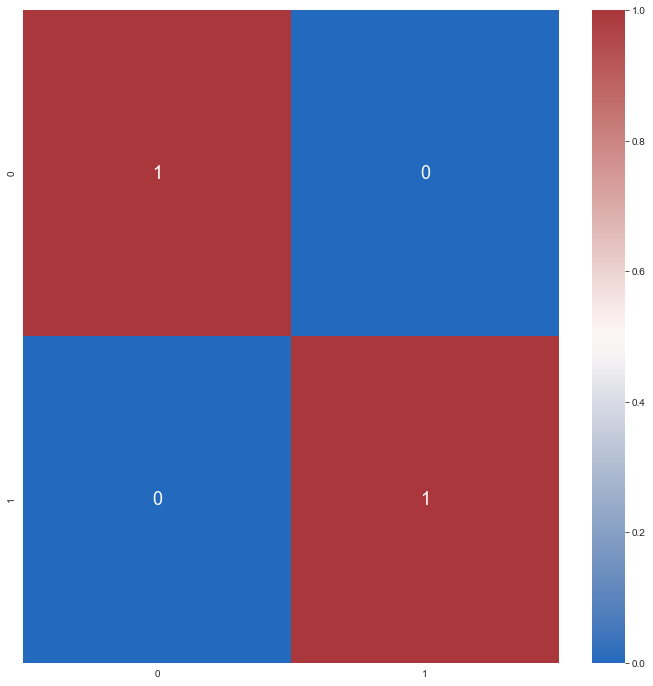

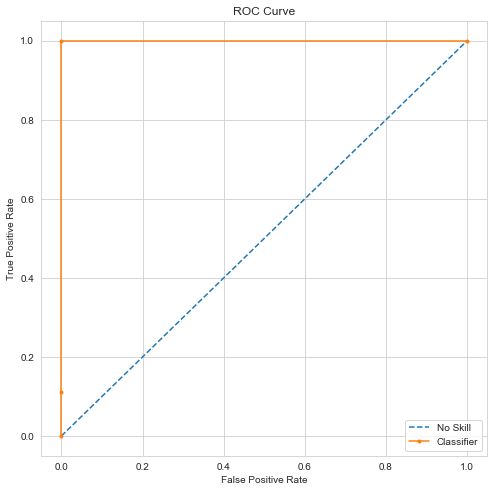

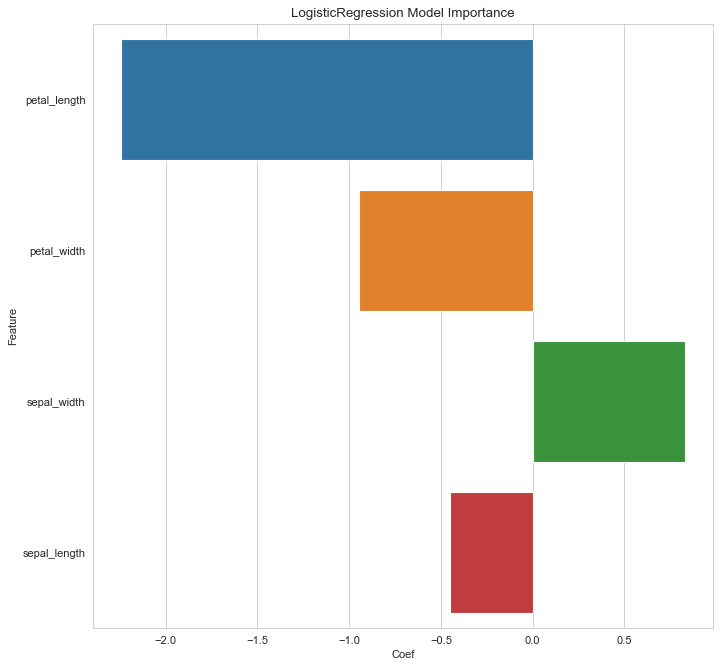

In [9]:
res = st.model_eval(
    X=iris[fts],
    y=iris['dummy'],
    model='logistic',
    params={'solver':'liblinear'},
    metrics=["accuracy", "f1", "roc_auc"],
    bins=None,
    pipe=None,
    scale=None,
    num_top_fts=None,
    num_cv=5,
    get_ft_imp=True,
    random_seed=4,
    binary=True,
    disp=True,
    log="log",
    log_name="model_eval_test.txt",
    log_path=None,
    log_note="This is a test of the model eval function"
)


## Model Eval Using the scale parameter

Random Seed Value: 4
Performing CV Runs: 5
Finished cv run: 1 time: 0.016
Finished cv run: 2 time: 0.015
Finished cv run: 3 time: 0.0159
Finished cv run: 4 time: 0.014
Finished cv run: 5 time: 0.015


,cv run,accuracy_scores,f1_scores,roc_auc_scores
0,1,1.0,1.0,1.0
1,2,1.0,1.0,1.0
2,3,1.0,1.0,1.0
3,4,1.0,1.0,1.0
4,5,1.0,1.0,1.0
5,mean,1.0,1.0,1.0
6,std,0.0,0.0,0.0


Final cv train test split
accuracy score: 1.0
f1 score: 1.0
roc_auc score: 1.0
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



,probab_bin,count,percent_actual
20,"(-0.05, 0.0]",0,NaN
0,"(0.0, 0.05]",20,0.0
4,"(0.05, 0.1]",0,NaN
2,"(0.1, 0.15]",1,0.0
5,"(0.15, 0.2]",0,NaN
6,"(0.2, 0.25]",0,NaN
7,"(0.25, 0.3]",0,NaN
8,"(0.3, 0.35]",0,NaN
9,"(0.35, 0.4]",0,NaN
3,"(0.4, 0.45]",0,NaN


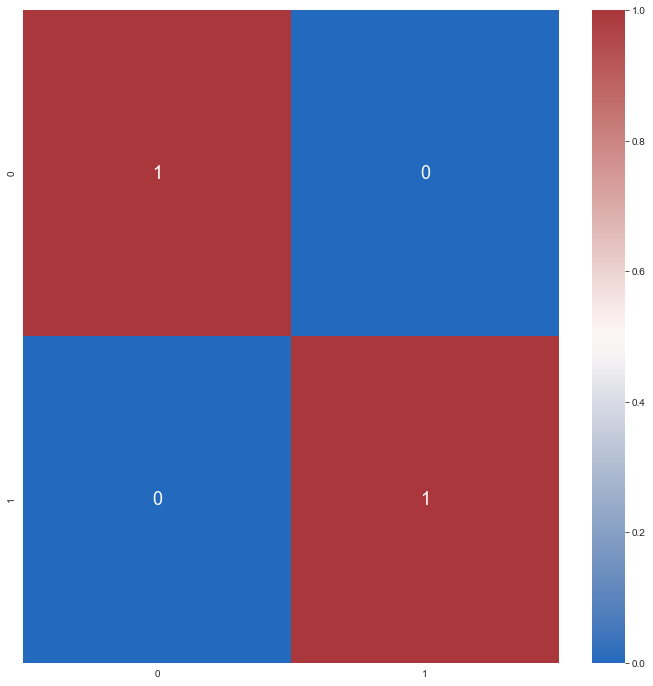

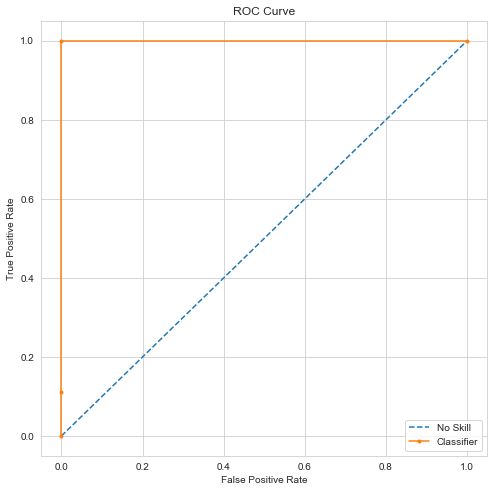

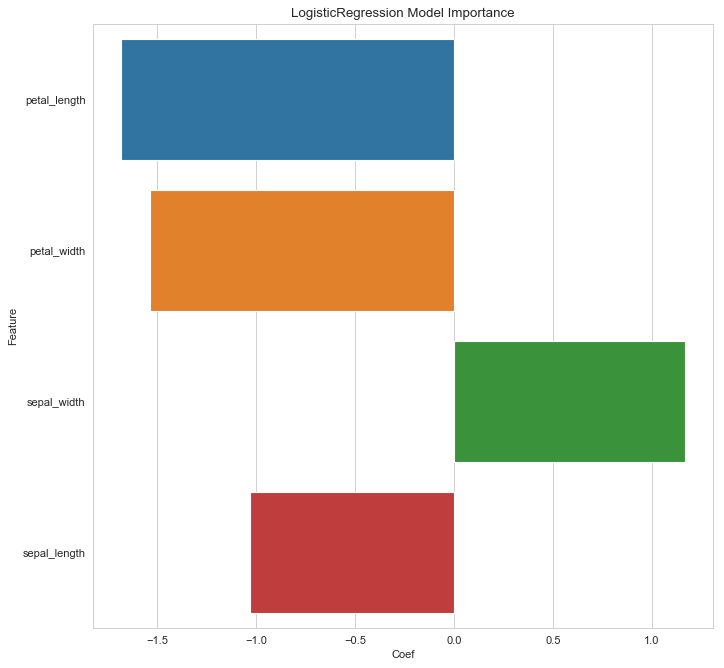

In [10]:
res = st.model_eval(
    X=iris[fts],
    y=iris['dummy'],
    model='logistic',
    params={'solver':'liblinear'},
    metrics=["accuracy", "f1", "roc_auc"],
    bins=None,
    pipe=None,
    scale="standard",
    num_top_fts=None,
    num_cv=5,
    get_ft_imp=True,
    random_seed=4,
    binary=True,
    disp=True,
    log="log",
    log_name="model_eval_test.txt",
    log_path=None,
    log_note="This is a test of the model eval function"
)

## Multi-Class Classification

Random Seed Value: 4
Performing CV Runs: 5
Finished cv run: 1 time: 0.1626
Finished cv run: 2 time: 0.1586
Finished cv run: 3 time: 0.1535
Finished cv run: 4 time: 0.1612
Finished cv run: 5 time: 0.193


,cv run,f1_scores,precision_scores
0,1,0.945419,0.966667
1,2,0.967059,0.974359
2,3,0.913043,0.914141
3,4,0.967059,0.962963
4,5,0.967963,0.966667
5,mean,0.952109,0.956959
6,std,0.021304,0.021728


Final cv train test split
f1 score: 0.968
precision score: 0.9667
 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



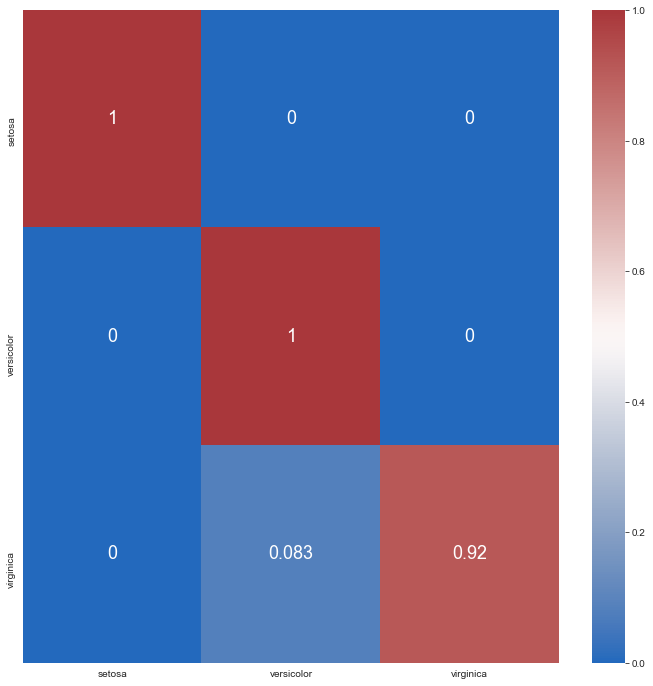

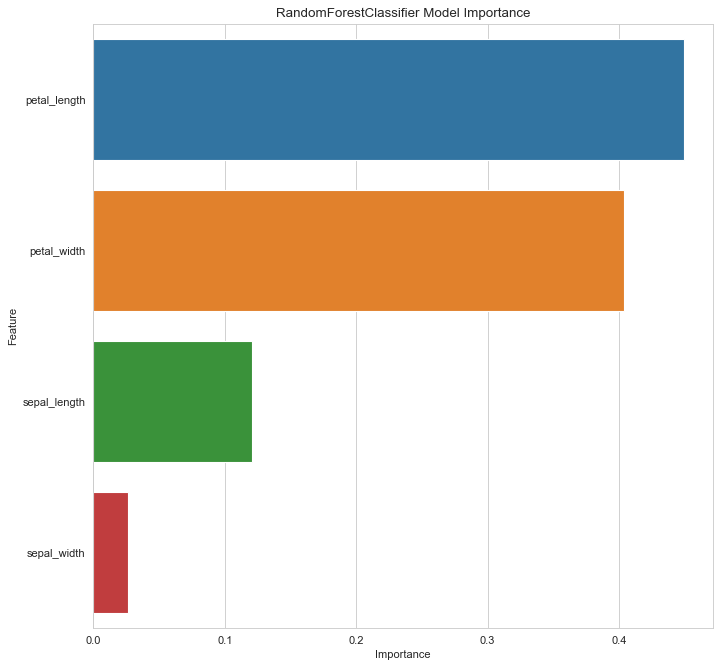

In [11]:
res = st.model_eval(
    X=iris[fts],
    y=iris['species'],
    model='rf_clf',
    params={'n_estimators':100, 'max_depth':10},
    metrics=["f1", "precision"],
    bins=None,
    pipe=None,
    scale=None,
    num_top_fts=None,
    num_cv=5,
    get_ft_imp=True,
    random_seed=4,
    binary=False,
    disp=True
)


## Classification Model Tuning with Feature Selection

**Default select from model is Logisitc Regression with L1 Penalty**

Random Seed Value: 417
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    2.9s finished


Mean cross val f1 score of best estimator during parameter tuning: 1.0

Parameters of the best model: 

RandomForestClassifier Parameters
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 417, 'verbose': 0, 'warm_start': False}

Performing model eval on best estimator
Random Seed Value: 417
Performing CV Runs: 5
Finished cv run: 1 time: 0.0868
Finished cv run: 2 time: 0.1007
Finished cv run: 3 time: 0.0937
Finished cv run: 4 time: 0.0884
Finished cv run: 5 time: 0.0985


,cv run,accuracy_scores,f1_scores
0,1,1.0,1.0
1,2,1.0,1.0
2,3,1.0,1.0
3,4,1.0,1.0
4,5,1.0,1.0
5,mean,1.0,1.0
6,std,0.0,0.0


Final cv train test split
accuracy score: 1.0
f1 score: 1.0
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



,probab_bin,count,percent_actual
20,"(-0.05, 0.0]",0,NaN
0,"(0.0, 0.05]",15,0.0
5,"(0.05, 0.1]",0,NaN
6,"(0.1, 0.15]",0,NaN
7,"(0.15, 0.2]",0,NaN
8,"(0.2, 0.25]",0,NaN
3,"(0.25, 0.3]",2,0.0
9,"(0.3, 0.35]",0,NaN
10,"(0.35, 0.4]",0,NaN
4,"(0.4, 0.45]",0,NaN


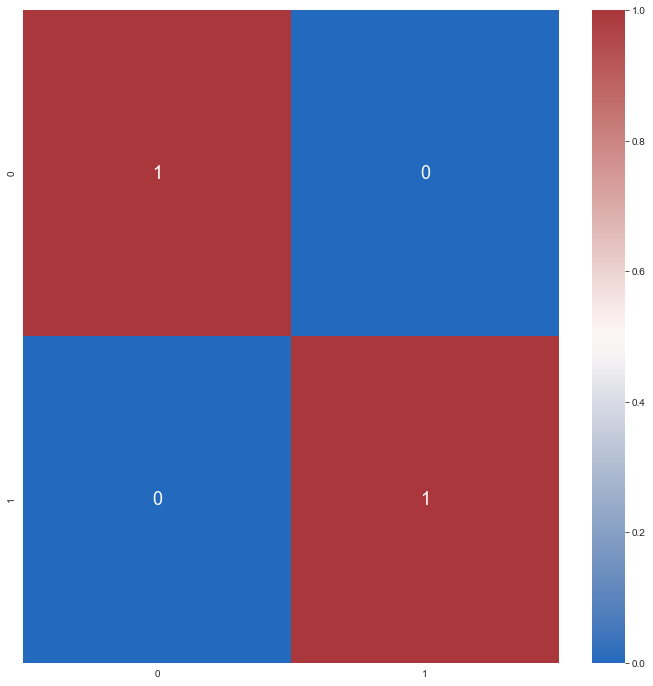

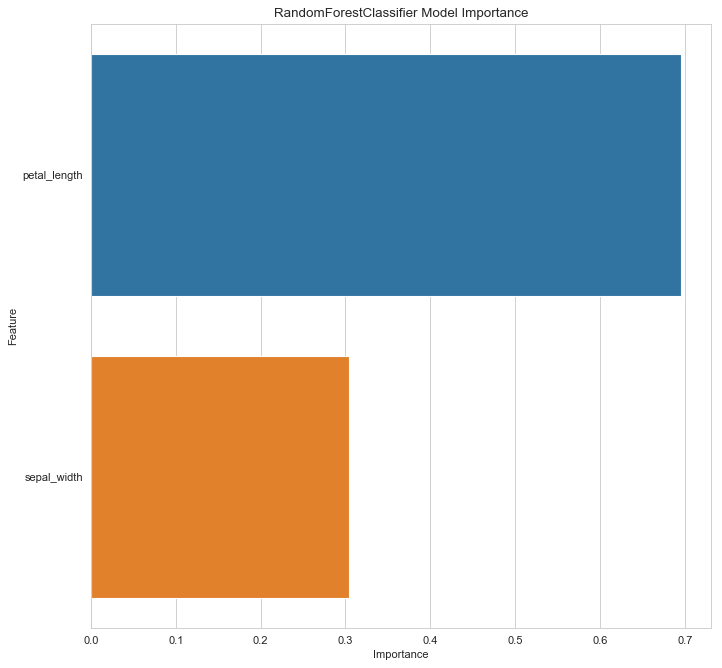

In [12]:
pars = {'n_estimators': [50,100]
       , 'max_depth':[3,5,10]
       }


res = st.tune_test_model(X=iris[fts],
                        y=iris['dummy'],
                        model='rf_clf',
                        params=pars,
                        tune_metric="f1",
                        eval_metrics=["accuracy", "f1"],
                        num_cv=5,
                        pipe=None,
                        scale=None,
                        select_features="select_from_model",
                        bins=None,
                        num_top_fts=None,
                        tuner="grid_cv",
                        n_iterations=15,
                        get_ft_imp=True,
                        n_jobs=2,
                        random_seed=None,
                        binary=True,
                        disp=True,
                        log="log",
                        log_name="model_tunetest_test.txt",
                        log_path=None,
                        log_note="This is a test of the tune test function"
                    )

## Classification Model Tuning Passing in a Pipeline for Feature Selection

Random Seed Value: 85
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished


Mean cross val f1 score of best estimator during parameter tuning: 1.0

Parameters of the best model: 

LogisticRegression Parameters
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 85, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Performing model eval on best estimator
Random Seed Value: 85
Performing CV Runs: 5
Finished cv run: 1 time: 0.01
Finished cv run: 2 time: 0.012
Finished cv run: 3 time: 0.011
Finished cv run: 4 time: 0.011
Finished cv run: 5 time: 0.011


,cv run,accuracy_scores,f1_scores
0,1,1.0,1.0
1,2,1.0,1.0
2,3,1.0,1.0
3,4,1.0,1.0
4,5,1.0,1.0
5,mean,1.0,1.0
6,std,0.0,0.0


Final cv train test split
accuracy score: 1.0
f1 score: 1.0
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



,probab_bin,count,percent_actual
20,"(-0.05, 0.0]",0,NaN
0,"(0.0, 0.05]",21,0.0
4,"(0.05, 0.1]",0,NaN
2,"(0.1, 0.15]",1,0.0
5,"(0.15, 0.2]",0,NaN
6,"(0.2, 0.25]",0,NaN
7,"(0.25, 0.3]",0,NaN
8,"(0.3, 0.35]",0,NaN
9,"(0.35, 0.4]",0,NaN
3,"(0.4, 0.45]",0,NaN


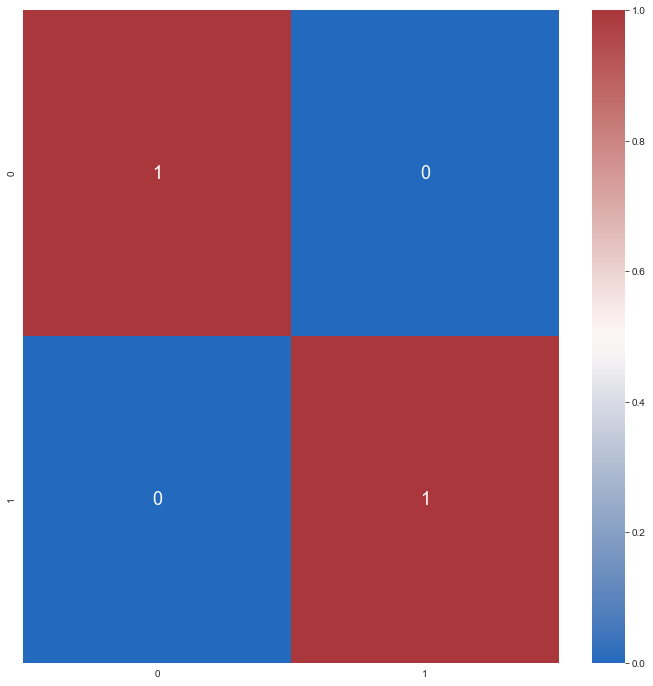

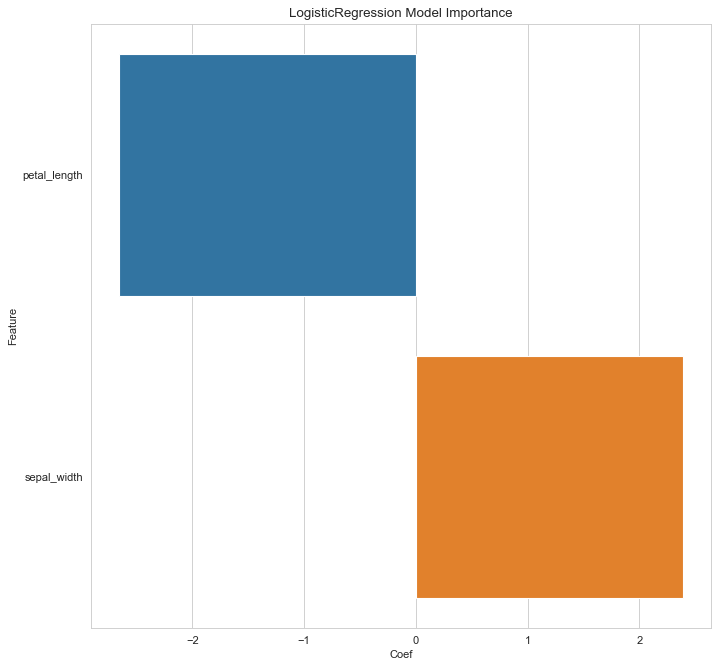

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

pars = {'solver': ['liblinear']
       , 'penalty':['l1','l2']
       , 'max_iter':[100, 300, 500]
       }

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False)

pipe = Pipeline([('feature_selection', SelectFromModel(lsvc, prefit=False))])

res = st.tune_test_model(X=iris[fts],
                        y=iris['dummy'],
                        model='logistic',
                        params=pars,
                        tune_metric="f1",
                        eval_metrics=["accuracy", "f1"],
                        num_cv=5,
                        pipe=pipe,
                        scale=None,
                        select_features=None,
                        bins=None,
                        num_top_fts=None,
                        tuner="grid_cv",
                        n_iterations=15,
                        get_ft_imp=True,
                        n_jobs=2,
                        random_seed=None,
                        binary=True,
                        disp=True,
                        log="log",
                        log_name="model_tunetest_test.txt",
                        log_path=None,
                        log_note="This is a test of the tune test function"
                    )

## Classification Model Parameter Tuning using Eagles Feature Selection
**Note default eagles feature selection includes correlation thresholding and logistic regression with l1 penalty. You could also pass it in as a pipeline as such:**

pipe = Pipeline([('feature_selection', EaglesFeatureSelection(methods=['regress']))])

Methods include:
- correlation: correlation threhsold: 
- rf_importance: random forest feature importance thresholding
- regress: l1 penalized regression coefficient selection 
- avg_model_rank: drops bottom percent (default bottom 10%) of feature after fitting random forest and logistic regression

Random Seed Value: 676
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Mean cross val f1 score of best estimator during parameter tuning: 1.0

Parameters of the best model: 

LogisticRegression Parameters
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 676, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Performing model eval on best estimator
Random Seed Value: 676
Performing CV Runs: 5
Finished cv run: 1 time: 0.0189
Finished cv run: 2 time: 0.018
Finished cv run: 3 time: 0.017
Finished cv run: 4 time: 0.017
Finished cv run: 5 time: 0.0189


[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    1.7s finished


,cv run,accuracy_scores,f1_scores,precision_recall_auc_scores
0,1,1.0,1.0,1.0
1,2,1.0,1.0,1.0
2,3,1.0,1.0,1.0
3,4,1.0,1.0,1.0
4,5,1.0,1.0,1.0
5,mean,1.0,1.0,1.0
6,std,0.0,0.0,0.0


Final cv train test split
accuracy score: 1.0
f1 score: 1.0
precision_recall_auc score: 1.0
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



,probab_bin,count,percent_actual
20,"(-0.05, 0.0]",0,NaN
0,"(0.0, 0.05]",20,0.0
3,"(0.05, 0.1]",0,NaN
4,"(0.1, 0.15]",0,NaN
5,"(0.15, 0.2]",0,NaN
6,"(0.2, 0.25]",0,NaN
7,"(0.25, 0.3]",0,NaN
8,"(0.3, 0.35]",0,NaN
9,"(0.35, 0.4]",0,NaN
2,"(0.4, 0.45]",0,NaN


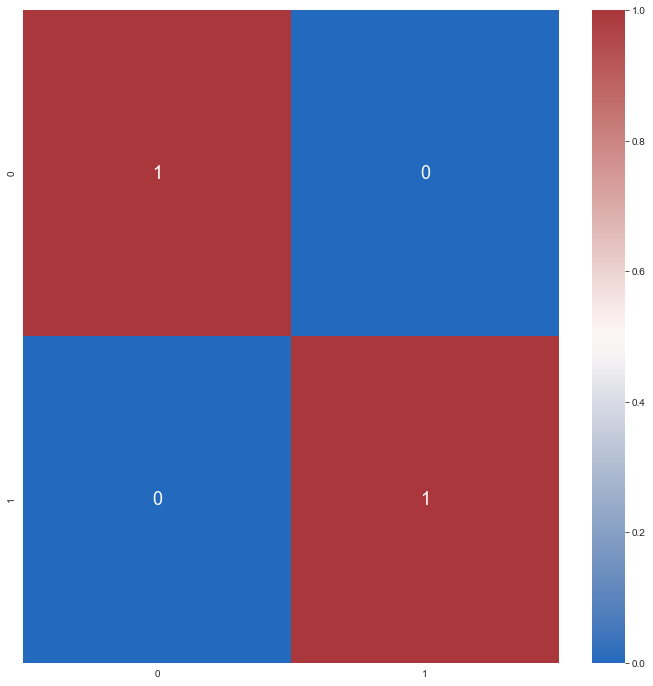

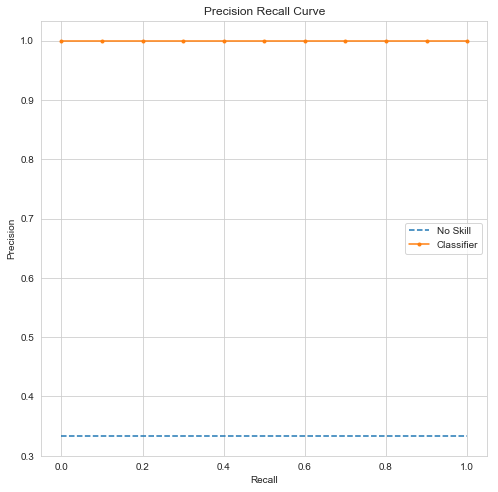

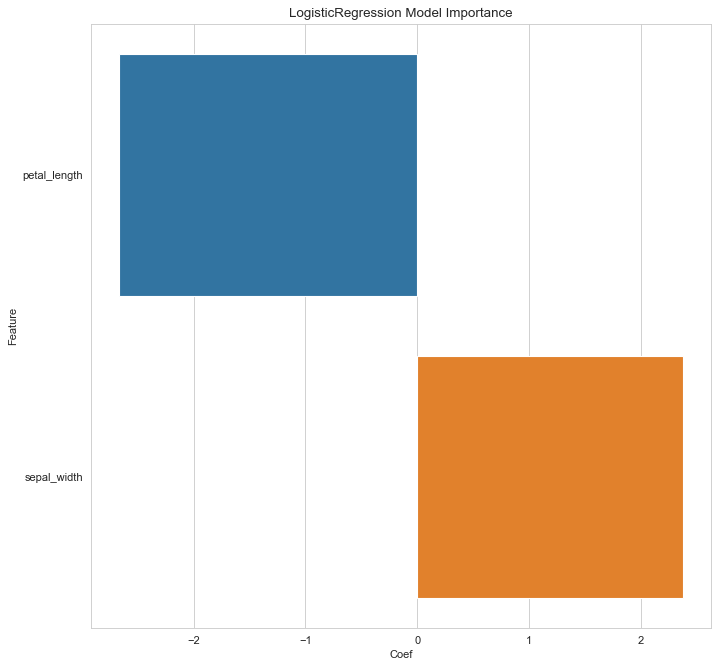

In [14]:
pars = {'solver': ['liblinear']
       , 'penalty':['l1','l2']
       , 'max_iter':[100, 300, 500]
       }

res = st.tune_test_model(X=iris[fts],
                        y=iris['dummy'],
                        model='logistic',
                        params=pars,
                        tune_metric="f1",
                        eval_metrics=["accuracy", "f1", "precision_recall_auc"],
                        num_cv=5,
                        pipe=None,
                        scale=None,
                        select_features="eagles",
                        bins=None,
                        num_top_fts=None,
                        tuner="grid_cv",
                        n_iterations=15,
                        get_ft_imp=True,
                        n_jobs=2,
                        random_seed=None,
                        binary=True,
                        disp=True,
                        log="log",
                        log_name="model_tunetest_test.txt",
                        log_path=None,
                        log_note="This is a test of the tune test function"
                    )

## Voting Classifier with embedded pipelines

Random Seed Value: 991
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   11.2s
[Parallel(n_jobs=2)]: Done  75 out of  75 | elapsed:   22.3s finished


Mean cross val f1 score of best estimator during parameter tuning: 1.0

Parameters of the best model: 

VotingClassifier Parameters
{'estimators': [('rf', Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('clf',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=10, n_estimators=250,
                                        random_state=4))])), ('lr', Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scale', MinMaxScaler()),
                ('clf',
                 LogisticRegression(C=0.25, max_iter=1000, random_state=4,
                                    solver='liblinear'))]))], 'flatten_transform': True, 'n_jobs': None, 'verbose': False, 'voting': 'soft', 'weights': [2, 1], 'rf': Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('clf',
                 RandomForestClassifier(class_weight='balanced_subsample',
             

,cv run,accuracy_scores,f1_scores,precision_scores,precision_recall_auc_scores
0,1,1.0,1.0,1.0,1.000000e+00
1,2,1.0,1.0,1.0,1.000000e+00
2,3,1.0,1.0,1.0,1.000000e+00
3,4,1.0,1.0,1.0,1.000000e+00
4,5,1.0,1.0,1.0,1.000000e+00
5,mean,1.0,1.0,1.0,1.000000e+00
6,std,0.0,0.0,0.0,9.930137e-17


Final cv train test split
accuracy score: 1.0
f1 score: 1.0
precision score: 1.0
precision_recall_auc score: 1.0
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



,probab_bin,count,percent_actual
20,"(-0.05, 0.0]",0,NaN
2,"(0.0, 0.05]",3,0.0
0,"(0.05, 0.1]",18,0.0
3,"(0.1, 0.15]",1,0.0
6,"(0.15, 0.2]",0,NaN
7,"(0.2, 0.25]",0,NaN
8,"(0.25, 0.3]",0,NaN
9,"(0.3, 0.35]",0,NaN
10,"(0.35, 0.4]",0,NaN
5,"(0.4, 0.45]",0,NaN


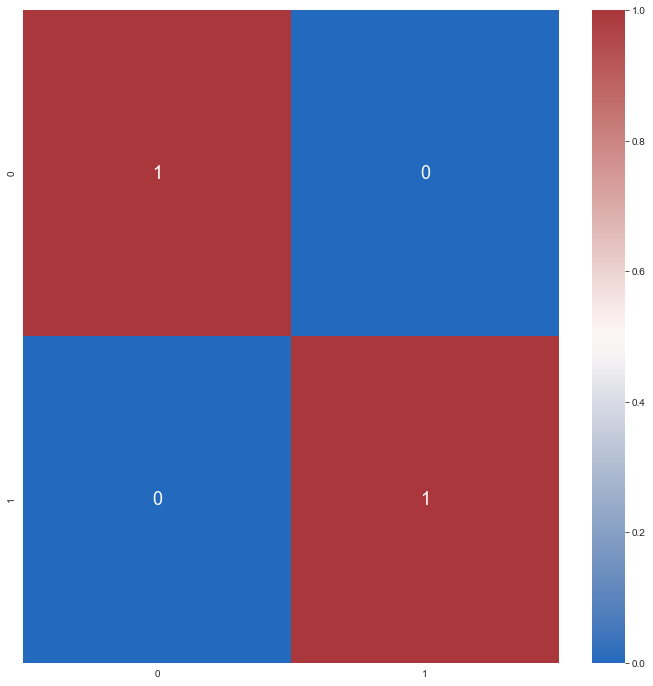

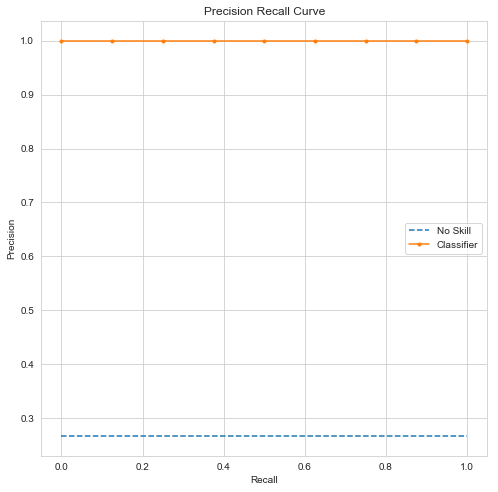

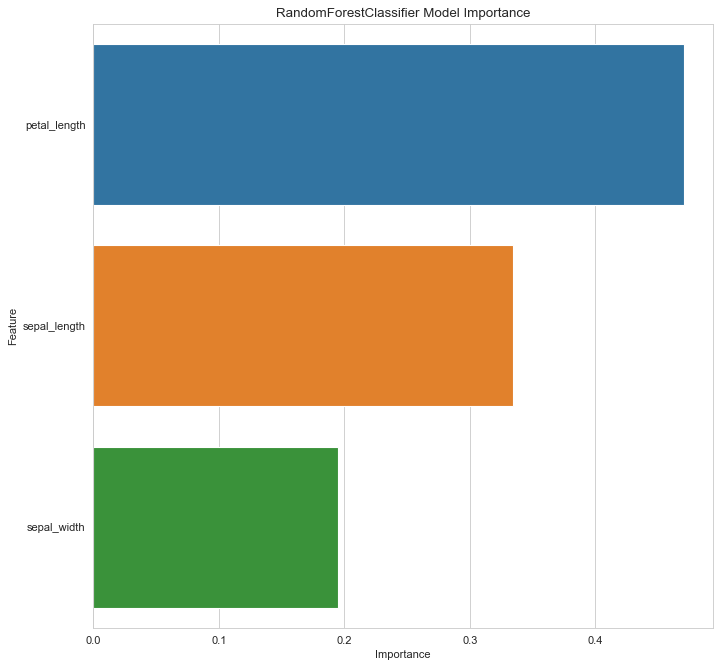

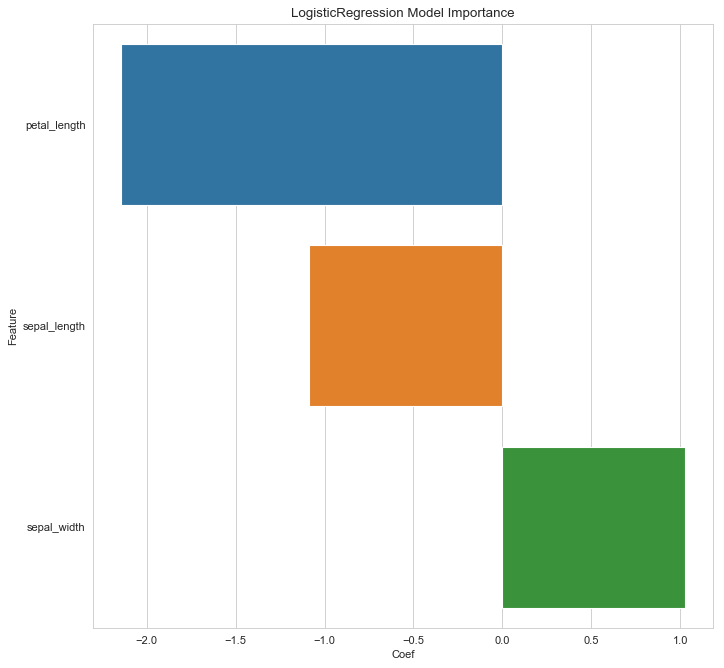

In [15]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from eagles.Supervised.utils.feature_selection import EaglesFeatureSelection

note = """
Voting Classifier with base lr and rf

grid search tuning for f1 for species setsoa

For missing values used median fills with imputer. 

eagles average model rank method used for feature selection
"""


# Define the models  
rf_pipe = Pipeline([('impute', SimpleImputer(strategy='median'))
                    ,('clf', RandomForestClassifier())
                   ])

lr_pipe = Pipeline([('impute', SimpleImputer(strategy='median'))
                    ,('scale', MinMaxScaler())
                    ,('clf', LogisticRegression())
                   ])


vc_clf = VotingClassifier(estimators=[('rf', rf_pipe)
                                      ,('lr', lr_pipe)]
                          , voting='soft')

model_pipe = Pipeline([('feature_selection', EaglesFeatureSelection(methods=['avg_model_rank']))])

# note because there are pipelines embedded within pipelines need to "double" specify 
#the clf to indicate the correct param pointing to within pipelines
pars = {'clf__rf__clf__n_estimators':[x for x in range(100,300,50)]
        ,'clf__rf__clf__max_depth':[10, 20]
        ,'clf__rf__clf__class_weight': [None, 'balanced_subsample']
        ,'clf__rf__clf__random_state':[4]

        ,'clf__lr__clf__penalty': ['l2']
        ,'clf__lr__clf__class_weight':[None, 'balanced']
        ,'clf__lr__clf__max_iter':[1000]
        ,'clf__lr__clf__C': [.25]
        ,'clf__lr__clf__solver':['liblinear']
        ,'clf__lr__clf__random_state':[4] 

        ,'weights':[[1,1],[1,2],[2,1]] 
       }


res = st.tune_test_model(X=iris[fts]
                        ,y=iris['dummy']
                        ,model=vc_clf
                        ,params=pars
                        ,tune_metric="f1"
                        ,eval_metrics=["accuracy", "f1", "precision", "precision_recall_auc"]
                        ,num_cv=5
                        ,pipe=model_pipe
                        ,scale=None
                        ,select_features=None
                        ,bins=None
                        ,num_top_fts=None
                        ,tuner="random_cv"
                        ,n_iterations=15
                        ,get_ft_imp=True
                        ,n_jobs=2
                        ,random_seed=None
                        ,binary=True
                        ,disp=True
                        ,log=["log","mod","data"]
                        ,log_name="model_tunetest_test.txt"
                        ,log_path=None
                        ,log_note=note)